# lab 7 - RBM i Deep Belief Networks 

używać pipeline w scikit
baseline około 91%
5 fold validacja, siatka, nieważne duże rozmiary, ważne, żeby było, nie musi być super wytrenowane
jedna warstwa rbm na ogół poprawia
wizualizacja wag
dbm nie będzie działał na fashion

Wczytaj zbiór danych. Są to obrazy w skali szarości, przypisane do jednej z wielu
klas, z pre-definiowanym podziałem na zbiór treningowy i testowy (w przypadku
MNIST oraz Fashion-MNIST jest to 60000 rekordów treningowych i 10000 testowych).

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import DatasetDict

In [2]:
from datasets import load_dataset

mnist = load_dataset("mnist", split={"train": "train", "test": "test"})
fashion_mnist = load_dataset("fashion_mnist", split={"train": "train", "test": "test"})


Dokonaj binaryzacji obrazów (zarówno zbiór treningowy, jak i testowy), a następnie
wyświel 10 przykładowych rekordów ze zbioru treningowego.

In [10]:
def binarize_images(batch):
    batch["image"] = [(np.array(img) > 127).astype(np.uint8) * 255 for img in batch["image"]]
    return batch

mnist_binarized = DatasetDict({k: v.map(binarize_images, batched=True) for k, v in mnist.items()})
fashion_mnist_binarized = DatasetDict({k: v.map(binarize_images, batched=True) for k, v in fashion_mnist.items()})


Map:   0%|          | 0/60000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/60000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

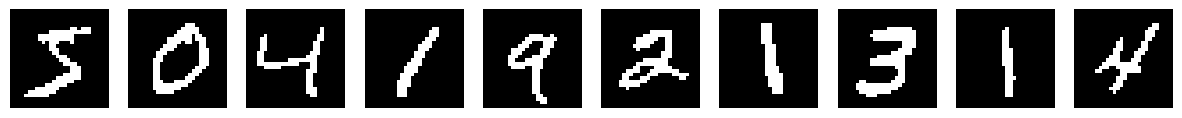

In [11]:
fig, axes = plt.subplots(1, 10, figsize=(15, 2))
for i, sample in enumerate(mnist_binarized['train'].select(range(10))):
    axes[i].imshow(sample["image"], cmap="binary")
    axes[i].axis("off")
plt.show()h

Zbuduj Pipeline złożony z:

– BernoulliRBM do ekstrakcji cech

– LogisticRegression jako klasyfikatora

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('rbm', BernoulliRBM(n_components=64, random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

Dostrój hiperparametry modelu korzystając z wyszukiwania siatkowego i walidacji
krzyżowej (GridSearchCV). Siatkę parametrów możesz dobrać stosowanie do zbioru
danych i dostępnych zasobów obliczeniowych. Przykładowa siatka znajduje się
poniżej.

In [36]:
param_grid = {
    'rbm__n_components': [70, 80, 90], # Number of hidden units
    'rbm__learning_rate': [0.05, 0.08, 0.1], # Learning rate
    'rbm__batch_size': [10, 20], # Batch size
    'logreg__C': [0.1, 0.5, 1.0], # Regularization strength
    }

In [28]:
X_train_mnist = mnist_binarized['train']['image']
y_train_mnist = mnist_binarized['train']['label']
X_test_mnist = mnist_binarized['test']['image']
y_test_mnist = mnist_binarized['test']['label']

In [37]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train_mnist, y_train_mnist)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


KeyboardInterrupt: 

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))